In [1]:
import pandas as pd  # ** csv data를 읽기 위해 pandas를 import함
fish=pd.read_csv('https://bit.ly/fish_csv_data') # ** csv 파일을 읽어들임
fish.head()

#** pandas는 csv 파일의 첫 줄을 자동으로 인식해 열 제목으로 만듦

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species'])) #** Species 열의 고유 값을 추출(해당 열의 원소 이름들을 추출)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
fish_target=fish['Species'].to_numpy() #** fish_target array를 Species 열의 값들로 된 numpy배열로 만듦
print(fish_target[:5])


['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [5]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

#** train set과 test set를 만든다

In [6]:
print(train_target[:10])

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch']


In [7]:
from sklearn.preprocessing import StandardScaler #** train set와 test set의 표준화 전처리를 위한 모델을 import
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)
print(train_scaled[0:10])


[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]
 [-0.9127463  -0.96490079 -0.95281644 -0.88017186 -0.99153566]
 [-0.79734143 -0.70251203 -0.76172762 -0.78282455 -0.54453018]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [-0.74104638 -0.67439895 -0.73567006 -0.61205928 -0.55733138]
 [-0.86771025 -0.7962223  -0.89201546 -0.93358694 -1.02183182]]


In [8]:
from sklearn.neighbors import KNeighborsClassifier #** k-최근접 이웃 분류기를 사용하기 위한 model을 import
kn=KNeighborsClassifier(n_neighbors=3) #** 객체 생성. 이웃의 수는 가장 가까운 이웃 3개로 세팅
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [9]:
print(kn.classes_) #** 타깃값을 그대로 사이킷런 모델에 전달하면 알파벳 순서대로 정렬이 된다

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(kn.predict(test_scaled[:5])) #** predict()는 타깃값으로 에측을 출력

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
import numpy as np
proba=kn.predict_proba(test_scaled[:5]) #** predict_proba()는 클래스별 확률값을 반환
print(np.round(proba,decimals=4)) #** round 함수는 반올림 함수. decimals로 유지할 소수점 아래 자릿수를 지정할 수 있음 if decimals=4 -> 소수점 4번째 자리까지 표기=5번째 자리에서 반올림


#** 출력 순서는 classes_의 속성과 같음-> 알파벳 순서로 정렬되어있는 타깃값

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [12]:
distances, indexes=kn.kneighbors(test_scaled[3:4])  #** 4번째 sample의 최근접 이웃의 클래를 확인하기 위함
print(train_target[indexes])

#** 4번째 sample을 확인해 보면 Roach 1개 Perch 2개임으로 확률을 생각해 보면 맞음

[['Roach' 'Perch' 'Perch']]


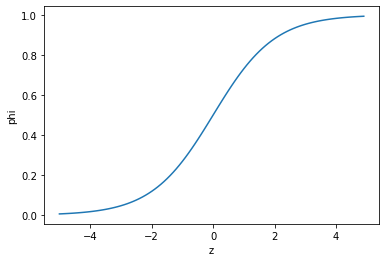

In [13]:
import numpy as np  #** sigmoid 함수를 그리기 위해 numpy를 import
import matplotlib.pyplot as plt  #** 수학 그래프를 그리기 위한 모델을 import
z=np.arange(-5,5,0.1) #** 배열을 만든다 -5와 5사이에 0.1간격으로 된 배열 z를 만듦
phi=1/(1+np.exp(-z))  #** 시그모이드 함수 값을 계산, 지수 함수 계산은 np.exp()로 한다
plt.plot(z,phi) #** x값은 z, y값은 phi=시그모이드 값
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [14]:



char_arr=np.array(['A','B','C','D','E'])  #** numpy array에 T or F 값을 전달하여 행을 선택할 수 있음  이를 불리언 인덱싱이라고 함
print(char_arr[[True,False,True,False,False]])

#**  A와 C만을 골라내기 위해 첫번째와 세 번째 원소만 True고 나머지 원소는 모두 False인 배열을 전달했음

#! 로지스틱 회귀로 이진 분류 수행하기

['A' 'C']


In [15]:
bream_smelt_indexes=(train_target=='Bream')|(train_target=='Smelt') #** train target에서 Bream or Smelt인것들을 True로 바꿈

print(bream_smelt_indexes[:5])

train_bream_smelt=train_scaled[bream_smelt_indexes]
print(train_bream_smelt[:10])
target_bream_smelt=train_target[bream_smelt_indexes]
print(target_bream_smelt[:5])

#** bream_smelt_indexes 배열은 도미 또는 빙어인 경우에 True 나머지는 False 일것임
#** train_bream_smelt와 target_bream_smelt에는 도미와 빙어에 대한 데이터만 들어있음 -> 이진 분류를 수행하는게 목표니까 맞음

[ True False  True False False]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [16]:
from sklearn.linear_model import LogisticRegression #** sklearn.linear_model 패키지에서 로지스틱 회귀 모델을 import 함
lr=LogisticRegression() #** 객체를 생성해줌
lr.fit(train_bream_smelt,target_bream_smelt) #** 훈련

LogisticRegression()

In [17]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [18]:
print(lr.predict_proba(train_bream_smelt[:5]))  

#** 첫번째 열은 음성 클래스에 대한 확률, 두 번째 열은 양성 클래스에 대한 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [19]:
print(lr.classes_) #** 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용함을 확인 할 수 있다

['Bream' 'Smelt']


In [20]:
print(lr.coef_,lr.intercept_) #** 계수를 확인

#** z=-4.404 x (Weight) - 0.676 x (length) x -0.663 x (Diagonal) - 1.013 x (Height) - 0.732 x (width) - 2.161

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [21]:
decisions=lr.decision_function(train_bream_smelt[:5]) 
print(decisions)

#** decisions_function()-> z값을 계산하는 method

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [22]:
from scipy.special import expit
print(expit(decisions))
#** expit()-> sigmoid function
#! 결과 값을 확인하면 decisions_function()은 양성 클래스에 대한 z값을 반환하는 것을 알 수 있음 -> 이 코드에서는 Smelt(빙어)에 대한 z값을 반환

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [23]:
lr=LogisticRegression(C=20,max_iter=1000)
#! 로지스틱 회귀로 다중 분류를 하기 위함
#** 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제-> L2규제  , 여기서 규제를 제어하는 매개변수는 C인데 릿지 회귀의 alpha와 다르게 C가 작아질수록 규제가 커짐, max_iter은 반복 횟수를 설정하는 매개변수
lr.fit(train_scaled,train_target)  #** 훈련시킴. train_scaled랑 train_target으로 훈련함
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

#** 결과를 보면 과대적합이나 과소적합은 아닌듯

0.9327731092436975
0.925


In [24]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [25]:
proba=lr.predict_proba(test_scaled[:5]) #** test output에 대한 확률을 보기위함
print(np.round(proba,decimals=3))#** decimals 매개변수를 통해 소수 4번째 자리에서 반올림 하도록 설정  np.round 사용하면 좋은 점-> 출력을 간결하게 할 수 있음


[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [26]:
print(lr.coef_.shape,lr.intercept_.shape)

#** lr.coef_.shape->(7,5)인 이유는 우선 생선의 종류가 7개고 lr가 [:5]니까임 그리고 lr.intercept_.shape=z 가 7개인 이유는 다중 분류에서는 각 class(여기선 생선 종류)에 따라 z값을 계산하기 때문

(7, 5) (7,)


In [27]:
decision=lr.decision_function(test_scaled[:5])  #** 각 행에대한 7개의 z값을 구함   . decision_function를 사용해서
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [28]:
from scipy.special import softmax  #** softmax 함수를 사용하기 위한 import softmax 함수는 시그모이드 함수처럼 확률을 확인할 때 사용하는데 다른점은 정규화가 되어있다는 것(전체 값에 대한 비율로 표현 됨)


proba=softmax(decision,axis=1) #** axis=1 -> 각 행에 대한 softmax를 계산 , axis 매개변수를 지정하지 않으면 배열 전체에 대해 softmax를 계산함

print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
